In [ ]:
# Code contribution: Reng & Andreaa
from google.colab import drive 
drive.mount('/content/drive',force_remount=True) 

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Web Mining")

FileNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Load movies data
movies = pd.read_csv('./ml-1m/movies.dat', sep="::",names=['MovieID', 'Title', 'Genres'],encoding='latin-1')
ratings = pd.read_csv('./ml-1m/ratings.dat', sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'], skipinitialspace=True)
users = pd.read_csv('ml-1m/users.dat', sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"],skipinitialspace=True) 

In [ ]:
#get unique genres as 
genres_unique = pd.DataFrame(movies.Genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
genres_unique

In [ ]:
movies['Genres'] = movies['Genres'].str.replace('|',' ')
movies.head()

In [ ]:
print('Total rows: ', len(movies))
#print('Unique rows based on movieId: ', len(movies.movieId.unique()))
print('Unique rows based on movieId, Title: ', len(movies.drop_duplicates(['MovieID', 'Title'])))
print("Null values for each column \n", movies.isnull().sum())
movies.head(5)

NameError: ignored

In [ ]:
ratings.head()
ratings["Timestamp"] = pd.to_datetime(ratings["Timestamp"], unit='s')

NameError: ignored

In [ ]:
print('Total rows: ', len(ratings))
print('Unique rows based on movieId, UserId: ', len(ratings.drop_duplicates(['MovieID', 'UserID'])))
print("Null values for each column \n", ratings.isnull().sum())
ratings.head(5)

Total rows:  1000209
Unique rows based on movieId, UserId:  1000209
Null values for each column 
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
print('Total rows: ', len(users))
print('Unique rows based on UserID: ', len(users.drop_duplicates('UserID')))
print("Null values for each column \n", users.isnull().sum())
users.head(5)

Total rows:  6040
Unique rows based on UserID:  6040
Null values for each column 
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# ADD average rating per movie in ratings dataframe
ratings['Avg_rating'] = ratings.groupby(['MovieID'])['Rating'].transform('mean')
ratings.head(10)

**Plots**

(0.0, 5.0)

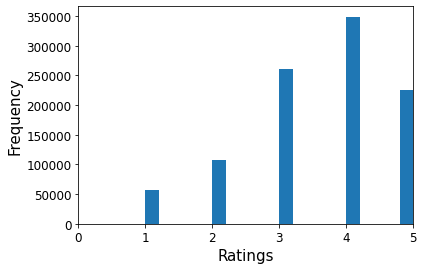

In [ ]:
#DISTRIBUTION OF RATINGS
ratings['Rating'].hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0, 5])

In [ ]:
# Distribution of the number of users and the number of movies rated per user
ratings.groupby(['UserID']).size().hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlim([0,3000])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)

In [ ]:
# Distribution of the number of movies being rated
ratings.groupby(['UserID']).size().hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlim([0,1300])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)

(0.0, 25.0)

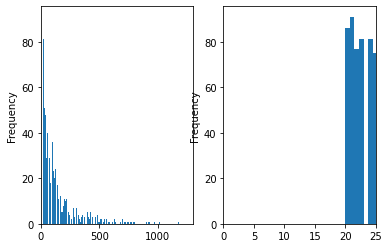

In [ ]:
# Distribution of the number of movies rated by each user 
import math 
plt.subplot(1, 2, 1)
tmp_users = ratings.value_counts(['UserID']).rename_axis('UserID').reset_index(name='count')
tmp_users['count'].plot.hist(bins=3000)
plt.xlim([0, 1300])

plt.subplot(1, 2, 2)
tmp_users['count'].plot.hist(bins=3000)
plt.xlim([0, 25])
# RENG: lowest number of movies rated is 20 so no trimming needed for users 
# plt.hist(x = tmp['UserID'], y = tmp['count'])
# ratings['UserID'].loc[ratings['UserID'] == 3021].count() # validated 

In [ ]:
# we can observe that not all movies in movies.dat are rated 
# we will remove those movies from movies.dat 
print(len(ratings))
print(ratings.head())
tmp = ratings.value_counts(['MovieID']).reset_index(name='count')
print('5th percentile is: ', int(tmp['count'].quantile(0.05)))
print('10th percentile is: ', int(tmp['count'].quantile(0.1)))
print('90th percentile is: ', int(tmp['count'].quantile(0.9)))
print('median is: ', int(tmp['count'].quantile(0.5)))
print(ratings['MovieID'].nunique())

1000209
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11
5th percentile is:  2
10th percentile is:  7
90th percentile is:  729
median is:  123
3706


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


   MovieID  count
0     2858   3428
1      260   2991
2     1196   2990
3     1210   2883
4      480   2672
3377


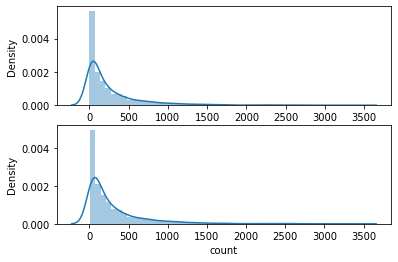

In [ ]:
plt.subplot(2, 1, 1)
tmp = ratings.value_counts(['MovieID']).rename_axis('MovieID').reset_index(name='count')
sns.distplot(tmp['count'])

# print(tmp['count'].mean())
plt.subplot(2, 1, 2)
pruned_tmp = tmp.copy() 
pruned_tmp = pruned_tmp[pruned_tmp['count'] > 5]
pruned_tmp = pruned_tmp.reset_index(drop=True)
sns.distplot(pruned_tmp['count'])
print(pruned_tmp.head())
print(len(pruned_tmp))

In [ ]:
# we can remove movies with less than 5 ratings - smoother graph and more appropriate 
# preserved rate of the users = 100% - do not remove any user 
# preserved rate of the movies 
movies_rating_filtered = movies.loc[(movies['MovieID'].isin(pruned_tmp['MovieID']))]
movies_rating_filtered = movies_rating_filtered.reset_index(drop=True)
print(len(movies_rating_filtered))
print(movies_rating_filtered)

3377
      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3372     3948             Meet the Parents (2000)   
3373     3949          Requiem for a Dream (2000)   
3374     3950                    Tigerland (2000)   
3375     3951             Two Family House (2000)   
3376     3952               Contender, The (2000)   

                            Genres  
0      Animation Children's Comedy  
1     Adventure Children's Fantasy  
2                   Comedy Romance  
3                     Comedy Drama  
4                           Comedy  
...                            ...  
3372                        Comedy  
3373                         Drama  
3374                     

In [ ]:
extended_movies = pd.read_csv('./movie_full_dataset.csv', encoding = 'latin-1')
# print(len(extended_movies))
final_movies = extended_movies.loc[(extended_movies['MovieID'].isin(movies_rating_filtered['MovieID']))]
final_movies = final_movies.reset_index(drop=True)
print(final_movies)
print('Preserved rate of the movies : {0:.2f} %'.format(len(final_movies)/len(movies.MovieID.unique()) * 100))

3859
      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3357     3948             Meet the Parents (2000)   
3358     3949          Requiem for a Dream (2000)   
3359     3950                    Tigerland (2000)   
3360     3951             Two Family House (2000)   
3361     3952               Contender, The (2000)   

                                           Genres  ImdbID  \
0     Adventure|Animation|Children|Comedy|Fantasy  114709   
1                      Adventure|Children|Fantasy  113497   
2                                  Comedy|Romance  113228   
3                            Comedy|Drama|Romance  114885   
4                                          Comedy  11

In [ ]:
final_movies.to_csv("./movie_final_full_dataset.csv", index=False)

In [ ]:
# users['Occupation'].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64

**EDA**

In [ ]:
#merging movies with filtered ratings
df = pd.merge(movies, ratings)
df2 = pd.merge(movies, ratings)
print("Null values for each column \n", df.isnull().sum())
print('Total rows for merged movies with filtered Ratings: ', len(df))
print('Total rows for merged movies with ratings: ', len(df2))
print('Rows dropped after filtering: ', len(df2) - len(df))

Null values for each column 
 MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Avg_rating    0
dtype: int64
Total rows for merged movies with filtered Ratings:  943471
Total rows for merged movies with ratings:  1000209
Rows dropped after filtering:  56738


In [ ]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Avg_rating
0,1,Toy Story (1995),Animation Children's Comedy,1,5,2001-01-06 23:37:48,4.146846
1,1,Toy Story (1995),Animation Children's Comedy,6,4,2000-12-31 04:30:08,4.146846
2,1,Toy Story (1995),Animation Children's Comedy,8,4,2000-12-31 03:31:36,4.146846
3,1,Toy Story (1995),Animation Children's Comedy,9,5,2000-12-31 01:25:52,4.146846
4,1,Toy Story (1995),Animation Children's Comedy,10,5,2000-12-31 01:34:34,4.146846


In [ ]:
#most rated movies
df.groupby('Title').size().sort_values(ascending=False)[:10]

Title
American Beauty (1999)                                   2758
Star Wars: Episode V - The Empire Strikes Back (1980)    2652
Star Wars: Episode IV - A New Hope (1977)                2585
Star Wars: Episode VI - Return of the Jedi (1983)        2457
Matrix, The (1999)                                       2343
Terminator 2: Judgment Day (1991)                        2337
Jurassic Park (1993)                                     2321
Men in Black (1997)                                      2319
Back to the Future (1985)                                2296
Saving Private Ryan (1998)                               2292
dtype: int64

In [ ]:
mdf = pd.concat([df.drop('Genres', axis=1), df.Genres.str.get_dummies(sep=' ')], axis=1)  

In [ ]:
mdf.head()

,MovieID,Title,UserID,Rating,Timestamp,Avg_rating,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,2001-01-06 23:37:48,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,4,2000-12-31 04:30:08,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,4,2000-12-31 03:31:36,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,5,2000-12-31 01:25:52,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,5,2000-12-31 01:34:34,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


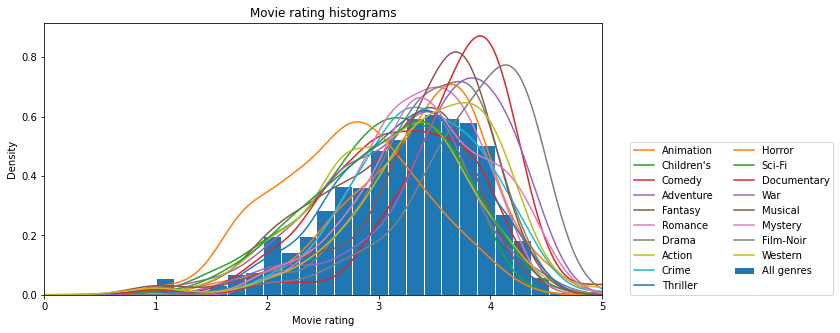

In [ ]:
df0 = mdf[['MovieID','Rating']].groupby('MovieID').mean()
df0.hist(bins=25, grid=False, edgecolor='w', density=True, label ='All genres', figsize=(10,5))

for genre in genres_unique.genre:
    df0 = mdf[mdf[genre]==1]
    df0 = ratings[ratings.set_index('MovieID').index.isin(df0.set_index('MovieID').index)]
    df0 = df0[['MovieID','Rating']].groupby('MovieID').mean()
    df0.Rating.plot(grid=False,  kind='kde', label=genre)
    
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

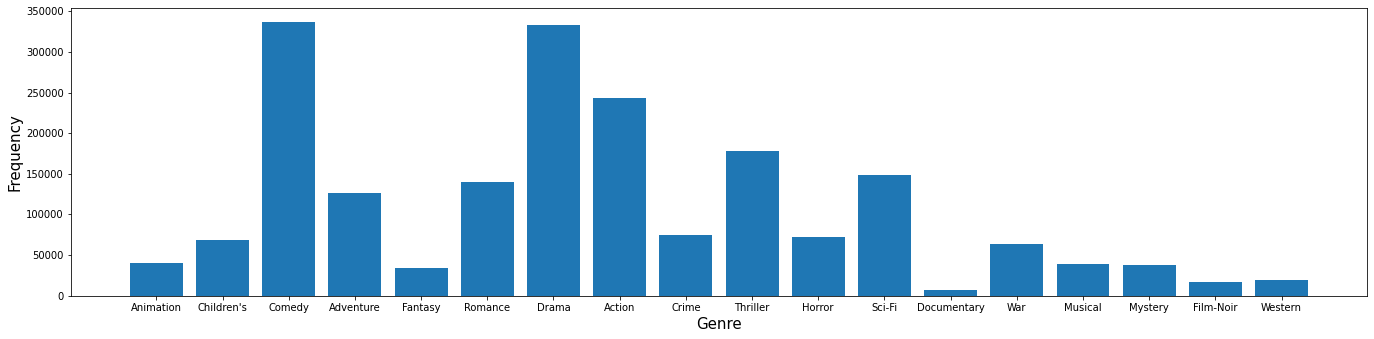

In [ ]:
#nr of movies per genre
genres=[]
count_genre=[]
for genre in genres_unique.genre:
  genres.append(genre)
  count_genre.append(len(mdf[ mdf[genre] == 1]))

fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(genres,count_genre)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [ ]:
# top 6 genres by the total number of movies
top6_genre = (mdf.iloc[:, 6:-1] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(6) # get the first 6
              .index.values # get the genre names
              )

top6_genre

array(['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi', 'Romance'],
      dtype=object)

In [ ]:
mdf["Year"] = mdf["Title"].str[-5:-1]
mdf.head()

,MovieID,Title,UserID,Rating,Timestamp,Avg_rating,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),1,5,2001-01-06 23:37:48,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,Toy Story (1995),6,4,2000-12-31 04:30:08,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,Toy Story (1995),8,4,2000-12-31 03:31:36,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,Toy Story (1995),9,5,2000-12-31 01:25:52,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,Toy Story (1995),10,5,2000-12-31 01:34:34,4.146846,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995


In [ ]:
genre_groups = (mdf.iloc[:, 6:]
                .groupby("Year")
                .sum()
               ).loc["1995":"2019", genres] # since 1995

In [ ]:
genre_groups

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
Year,,,,,,,,,,,,,,,,,,
1995,3486,6176,20329,7401,1168,11840,25075,15112,7182,13001,2083,6900,430,4021,952,1217,358,594
1996,2543,3678,19485,8959,2207,10826,21208,14900,5577,14926,3078,7272,867,4316,1857,2246,278,252
1997,1169,2721,20536,8806,676,8842,24105,18987,8453,19689,3194,12119,552,2995,1121,7847,2070,0
1998,3801,4678,23545,5046,424,12578,22399,19194,8370,17318,3297,8103,538,3716,827,4883,1043,26
1999,4059,4036,33133,5749,2348,8016,26396,14057,2753,19315,6038,9341,824,1358,409,1554,0,840
2000,2517,2187,13797,2019,123,1903,11893,10564,1728,8856,2126,4959,383,1095,175,520,0,0


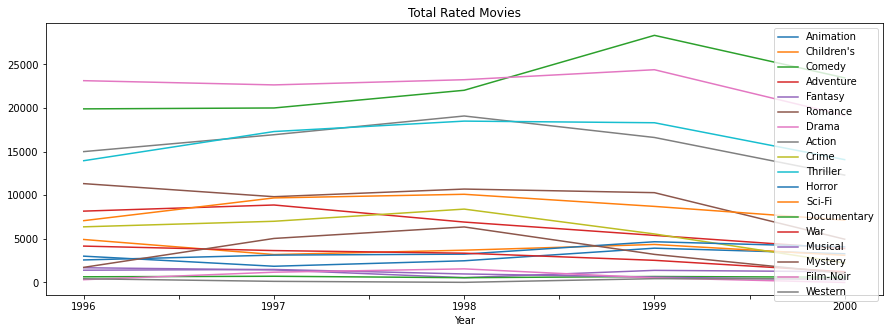

In [ ]:
genre_groups.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Movies")

In [ ]:
genre_groups_top6 = (mdf.iloc[:, 6:]
                .groupby("Year")
                .sum()
               ).loc["1995":"2019", top6_genre] # since 1995

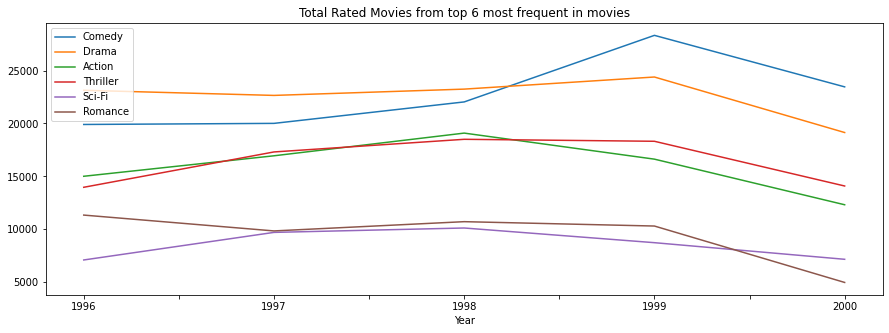

In [ ]:
genre_groups_top6.rolling(2).mean().plot(figsize=(15,5),
                                    title="Total Rated Movies from top 6 most frequent in movies")

**userID-movieID matrix for Collaborative Filtering**

In [ ]:
matrix = ratings_f.pivot(index = 'MovieID', columns ='UserID', values = 'Rating').fillna(0)
matrix.head(3)

UserID,1,2,3,5,6,8,9,10,11,13,...,6026,6030,6031,6032,6033,6035,6036,6037,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,4.0,4.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## User EDA

In [ ]:
users['Age'].hist(); # We can see that most of the users(approximately 2000) belongs to the age group of 25-34(see the age group dictionary). There are approximately 1000 people belongs to age groups 18-24, 35-44 and 45-49.

In [ ]:
users['Gender'].hist();

In [ ]:
ratings_grouped_by_users = users.groupby('UserID').size()
ratings_grouped_by_users.head()

plt.figure(figsize=(25, 10))
plt.hist(x=[ratings.UserID], bins=1000)
plt.title("Overall Ratings by User")
plt.show()